<a href="https://colab.research.google.com/github/bryan3342/Data-Science-CSCI-381/blob/main/Diabetes_Prediction_Model_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction




##Aim for Our Project
Our project aims to develop a robust predictive model for diabetes analysis such as diabetes prediction, blood glucose control, patient outcome, etc. Given the significant impact diabetes has in today's society and the increasing availability of **healthcare data**, effective analytical models are cruical for early detection, personalized treatment and improved patient outcomes.

Our team will explore a dataset related to different variables surrounding diabetes to identify key features and relationships that contribute to the outcome. We will leverage various machine learning techniques, including logistic regression, a Support Vector Machines (SVM), K-Nearest Neighbors (KNN) and different tree models to build predictive models.

Our approach will consist of the following developmental stages of our analysis:


*   **Comprehensive EDA :** We will begin by thoroughly examining the dataset, creating a comprehensive data summary and performing an EDA to uncover patterns, outliers and potential issues. This will involve utilizing frameworks such as the "7 stories one tells with data" to gain deeper insights.

*   **Data Processing and Feature Engineering :** To prepare the data for modeling, we will address missing values through various imputation techniques and engineer new features that may enhance model performance. We will carefully test out feature engineering and imputation strategies using statistical methods like chi-square and it's p-values.
*   **Model Development and Evaluation :** We will develop a range of predictive models, evaluating their performance using a suite of metrics including Precision, Accuracy, Recall, Specificity and F1-Score.


*   **Hyperparameter Tuning and Ensemble Modeling :** To optimize our models, we will systematically tune hyperparameters and explore the benefits of combining multiple models throguh ensemble methods.


*   **Comprehensive Analysis and Reporting :** Finally, we will summarize our end-to-end data science approach, discuss the iterative process of model refinement, and present the characteristics and performance of our final chosen model.

Through this **structured approach**, our goal is to deliver an insightful analysis and reliable predictive model that can contribute to better understanding and management of predicting trends in those with diabetes.



##What is diabetes?
Diabetes is a condition were your blood sugar is high and your pancreas doesn’t make enough insulin or isn’t responding to the effects of insulin properly (Cleveland Clinic). Glucose or sugar comes from the foods and drinks we consume. Foods like rice, potatoe, fruits are high in carbohydrates. These carbohydrates are broken down into glucose during digestion. When glucose or simple sugar enter our blood streams, it will trigger the pancreas to release insulin. Insulin is what opens up the cells for the cells to receive glucose. Without insulin, the cell will not open and the glucose will stay in the blood stream. This causes high glucose levels in the body, which will lead to other health issues.

*Diabetes*, from Cleveland Clinic. https://my.clevelandclinic.org/health/diseases/7104-diabetes

##Questions To Ask Before Analyzing Our Data Set

Prior to fully breaking down our dataset into a more concise and cleaned set of data, we can prepare questions to solve based on the features presented such as :


*   What might indicate that someone *has* diabetes?

*   As you age, does your risk of diabetes *increase*?

*   How does insulin levels *indicate* diabetes?

*   Does pregnancy play a *key role* in hereditary diabetes?

*   Do any physical traits in a carrier *indicate* that they have diabetes?

Something to keep in mind as well :

*  Hormonal imbalances: During pregnancy, the placenta releases hormones that cause insulin resistance. You may develop gestational diabetes if your pancreas can’t produce enough insulin to overcome the insulin resistance. Other hormone-related conditions like acromegaly and Cushing syndrome can also cause Type 2 diabetes (Cleveland Clinic).


# Conducting Our EDA :

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading dataset from github repository
url = "https://github.com/falsefoobar/CS381/blob/main/diabetes.csv?raw=True"
df = pd.read_csv(url)


display(df.head())
display(df.info())
display(df.shape)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

(768, 9)

##**Dataset Pre-Processing**
After extracting our data we can see the dataset's structure, content and characteristics before we conduct a more in-depth analysis.


*   `df.head()` lists some of the prominent column names such as `Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age` and `Outcome`
  * We can see that the data types all appear to be numerical, meaning we do not need to order the values into a categorical format.  
* `df.info()` displays the column by index and confirms the data types of the values per row. We also confirm that there are only `non-null` entries.
*`df.shape()` returns a tuple representing the dimensions of the dataframe which means we have 9 confirmed features and 768 patient records to work with.

After extracting the features from this dataset, we can look into the deeper meaning behind the variables :

* `Pregnancies`: The number of times the patient has been pregnant.

* `Glucose`: the concentration of glucose in the blood

* `BloodPressure`: thepatient's blood pressure  

* `SkinThickness`:  The thickness of the skin

* `Insulin`: The level of insulin in the blood

* `BMI`: The body mass index

* `DiabetesPedigreeFunction`: a measure of diabetes family history

* `Age`: age of the patient

* `Outcome`: 0 for negative, 1 for positive for diabetes

## Statistical Data for Numerical Features
A statistical summary give sus precise numbers to describe our data. We're able to:

*   **Quantify our Data :** We have exact figures to the skew of our histograms.
*   **Identifying Central Tendencies :** We can assess the median, mean and standard deviation of our features.
* **Pinpointing Issues and Inform PreProcessing :** We can explicitly check our values and begin to generate suspicions about possibilites of missing data. We can also highlight extreme maximum values as outliers. We can begin to prep the columns that are identified to need imputation, transformation or outlier handling.

We generate our statistics by using `df.describe()` method.




In [7]:
# Outputting descriptive statistics for all numerical columns into a Data Frame
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##Points Of Interest
There are some quick observations we can see from our statistical table such as:


*   **Missing Data Valuse :** It seems that the **minimum** for `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI` is 0 which is impossible for these features.  We can properly look into them through our generated histograms but we need to be cautious about these missing values.
*   **Heavy Outliers :** We can see that for `Pregnancies`, we have a high maximum value of 17 which while not *impossible*, it is very unlikely that this is the case. We can also see `Insulin`'s maximum value is 846 which is medically unreasonable. Feature Engineering can help tackle any potential outliers we have in our data.

After generating a statistical summary of our numerical features, we can move on towards visualizing our data.*italicized text*



## Visualizations of Data
We can properly represent the data visually and understand the distributions more comprehensively.

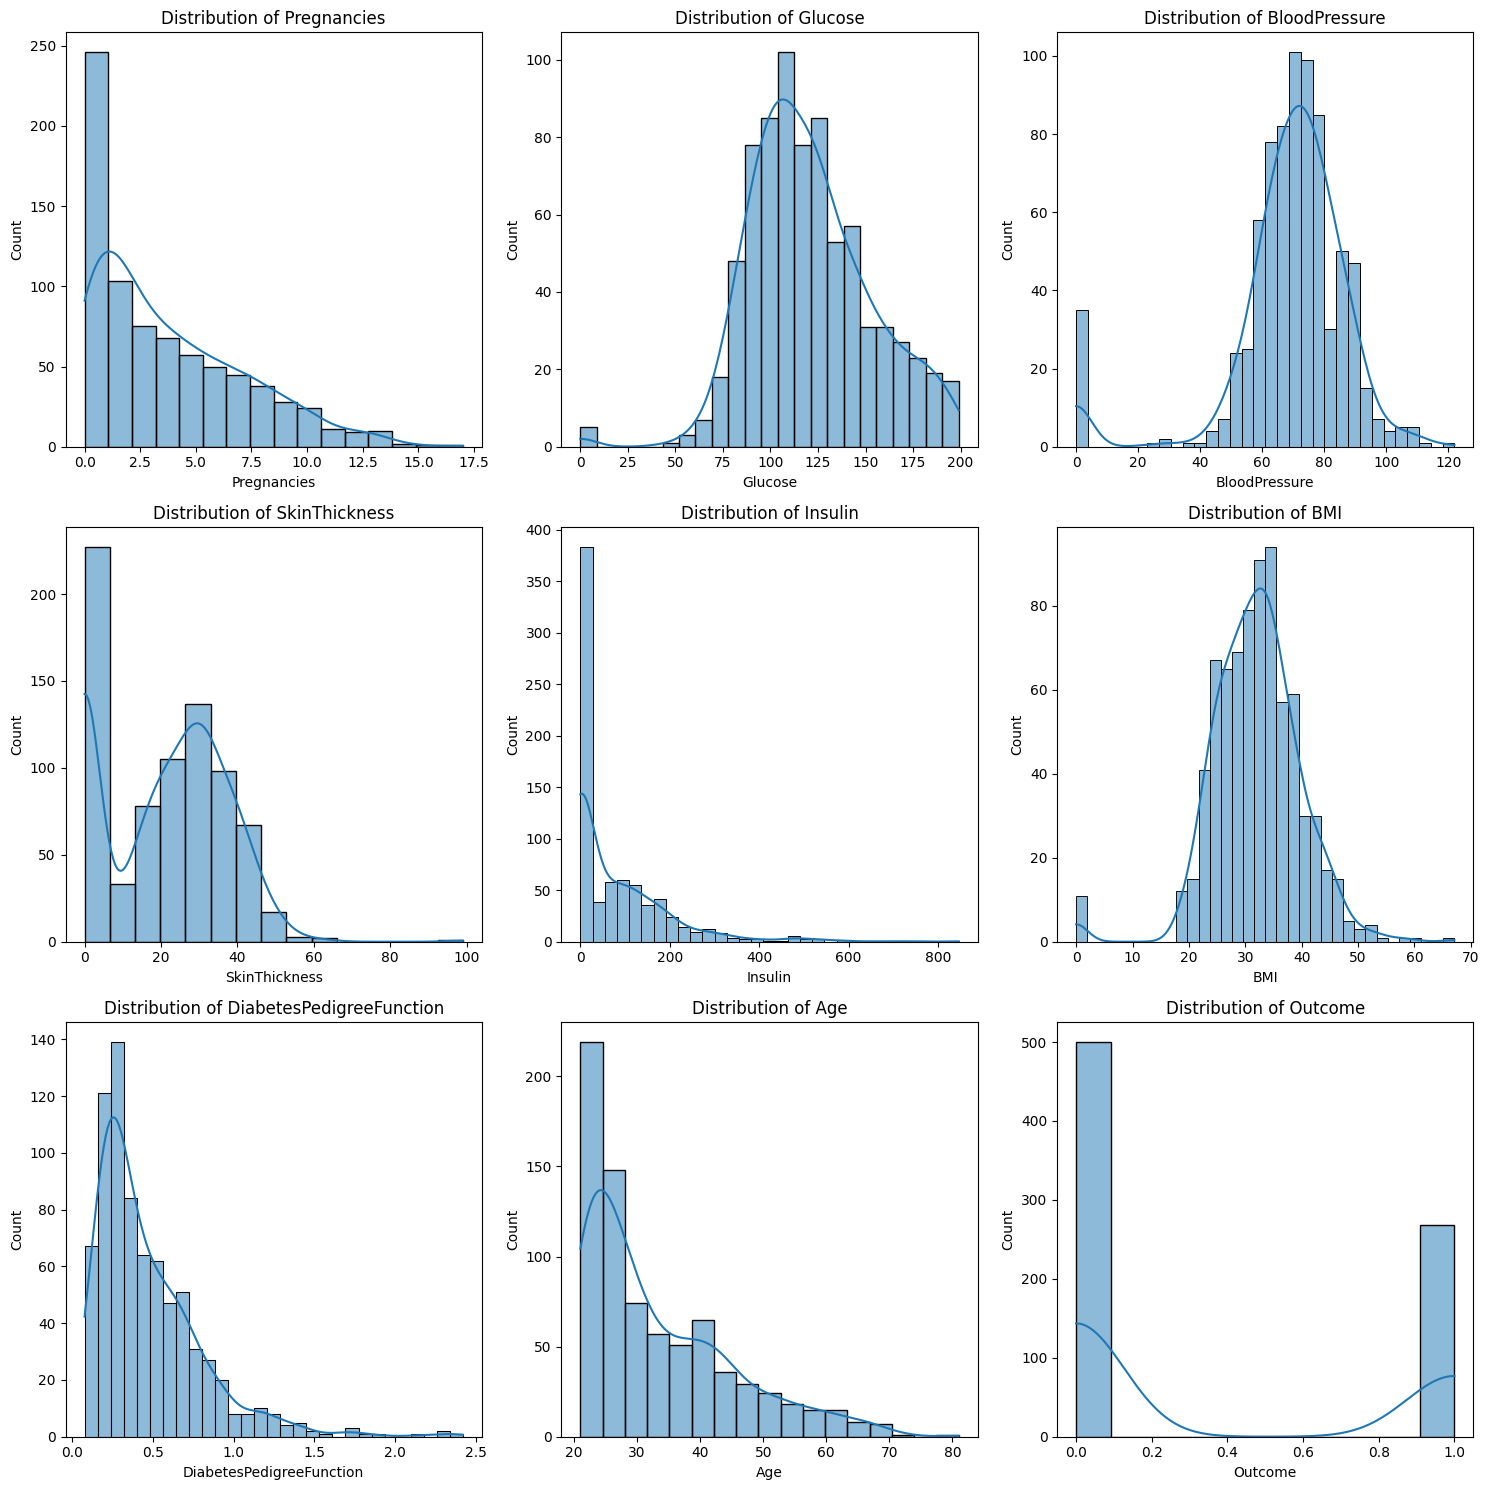

In [8]:
# Create distribution plots for each feature
features_to_plot = [col for col in df.columns]

# Determine the number of rows and columns for the matrix
n_features = len(features_to_plot)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create distribution plots for each feature on a separate subplot
for i, col in enumerate(features_to_plot):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

## Univariate Analysis of Numerical Features
We decided to choose histograms as our visual tool to show how the values of each feature are distributed across it's range. We can find where **most values fall**, our **spread of values**, the **shape of the distribution** and perhaps any **unusual values such as outliers or anomalies**.

<h3>Numerical Features:</h3>


*   `Pregnancies` : We can see that we have a **right-skewed distribution**,a s a large portion of our data have a low number of pregnancies (0, 1, 2). This makes sense in a general population dataset as there a few individuals with a very high number of pregnancies (**could be a potential outlier**)
*   `Glucose` : We can see that there's a abnormal amount of data with people who have 0 glucose levels. This raises concern because medically speaking , a glucose level of 0 is impossible. Reasonings behind this could be that the values in the column could represent missing data or values that weren't recorded. Moving past that, we can see there seems to be a slight **positive right-skewed distribution**, indicating typical blood sugar ranges. We will need to imputate this column.
* `BloodPressure` : We can also see that there is an abnormality of data at 0 which is also medically impossible. Otherwise, the data seems very symmetrical, resembling a bell curve.
* `SkinThickness` : This plot has an even larger and taller bar at 0 , which is going to definitely cause issues when analyzing the data further. Otherwise we see a **right-skewed distribution**. We can see that many individuals have a natural low skin thickness. This column strongly requires **imputation**.
* `Insulin` : This is the most problematic distribution, having an enormous spike at 0 meaning we have a lot of missing data. For the non-zero values, we have a **extremely right-skewed** distribution with many of the values clustered around 200. The extreme skewness means that most people have low insulin levels but a few have very high levels (checks out because of diabetes). We will most likely need to **imputate and transform the data** to make it  more manageable for models for it's extreme outliers.
* `BMI` : There seems to be a bell curve centered around 30 but notice a small bar on the left for 0. Most of the distribution is quite normal but 0 means there is missing data there as it is physiologically impossible. We can see that there is a good chunk of data above ~25 BMI which is typically considered overweight to obese range; a key factor in diabetes.
* `DiabetesPedigreeFunction` : We can see a normal **right-skewed distribution** with a large bar at an average rate of 0.5; a bit under the current average at around 0.8.
* `Age` : The ages appear to be all in their early 20's - late 30's which means there are a large amount of young adults within the dataset. We have a **right-skewed distribution** with a tail leading towards what it seems to be 80 years old as the maximum.

<br>After going in depth with every feature, our observations are vital as they can directly guide our next steps in data preprocessing and feature engineering. We will need to address the **missing values**, consider **data transformations** and **managing outliers** before we start working on our predictive models.


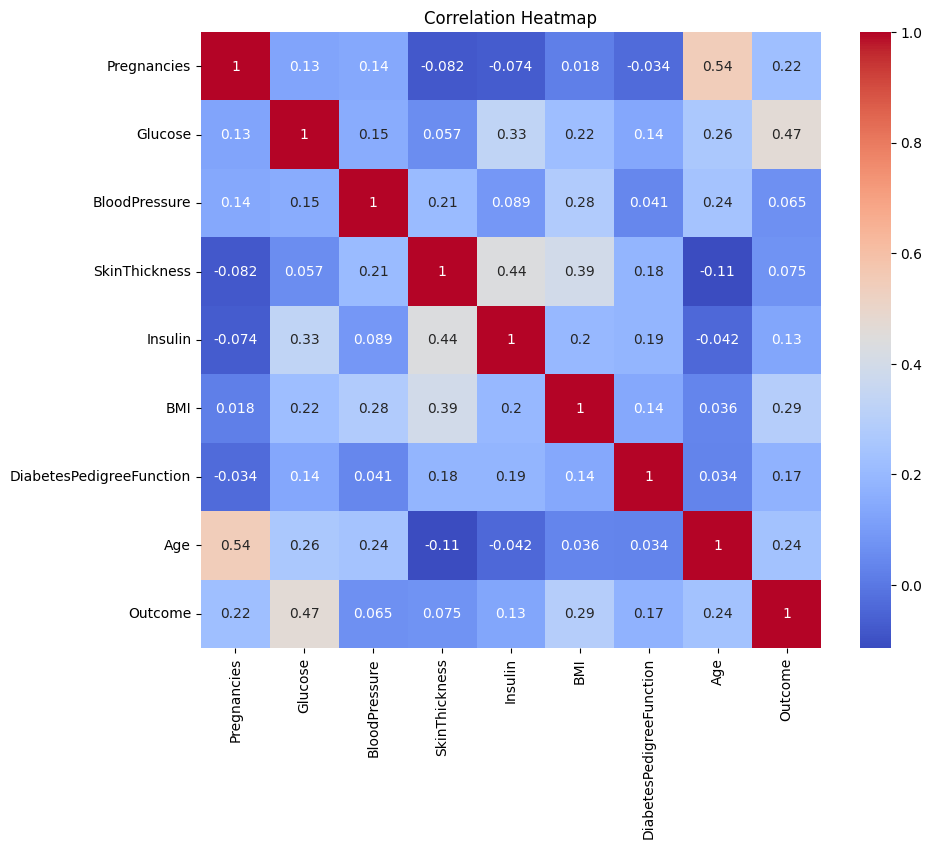

In [6]:
# Create a heatmap of the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Bivariate Analysis : Numerical Feature vs Numerical Feature
###(Correlation Matrix & Heatmap)

In our previous step, we looked at each numerical feature individually but now we're going to examine how the pairs of numerical features **relate to each other**. Are they moving in the same direction? Opposite directions? Or is there no clear pattern?

We represent the analysis using a **Correlation Heatmap** that tells us the *strength* and *direction* of the relationship between two of our numerical variables.

**Key Takeaways From Correlation Matrix**
* **Symmetrical :** The heatmap is symmetrical, which means the correlation between row `Glucose` and column `BMI` will be the same as the relation for row `BMI` and column `Glucose`.
* **Correlations with `Outcome` :**
  * We can see that `Glucose` has the **strongest positive correlation** (0.47) with `Outcome`. This means that as `Glucose` levels increase, the likelihood of someone having Diabetes tends t increase. This proves that high blood glucose is a primary indicator of diabetes, making `Glucose` a very important predictive feature.
  * `BMI` (0.29) shows a moderate positive correlation with `Outcome`. Higher `BMI` values are associated with higher likelihood of diabetes.
  * `Age` (0.22) shows a moderate positive correlation which shows that as `Age` increases, the chance of `Outcome` tends to increase.
  * `Pregnancies` (0.22) also has a moderate positive correlation, suggesting that having more pregnancies could be associated with a higher risk of diabetes.
  * `DiabetesPedigreeFunction` (0.17) is weaker but still a positive correlation; indicating that there a higher genetic predisposition score is linked to a higher chance of diabetes.
  * `Insulin` (0.13), `SkinThickness` (0.075), `BloodPressure` (0.065) show a relatively weaker positive correlation to `Outcome` which just means these features just aren't as strong.
* **Correlations Among Independent Features :**
  * We have 3 relatively strong correlations that could be a concern for *multicollinearity*.
  * `Glucose` and `Insulin` (0.33) are moderately positively correlated; as glucose levels go up so do insulin levels. Not typically a multicollinearity problem for modeling.
  * `Pregnancies` and `Age` (0.54) have a strong positive correlation. People who are older tend to have a higher pregnancy count, which is expected. This doesn't necessarily promote a severe multicollinearity problem for our models.
* **Summary of Insights :**
  * We can see that the key predictors for diabetes are `Glucose`, `BMI`, `Age`, and `Pregnancies`. They will be very influential in predicting diabetes status.
  * The observed correlations between `Glucose` with `Insulin`, `SkinThickness` with `BMI` and `Pregnancies` with `Age` align with medical expectations, increasing confidence of our data.
  * We can see taht is potential multicollinearity, so we will most likely need a more formal check using **Variance Inflation Factors** or **VIF's** during Feature Engineering.

#References
https://www.aad.org/public/diseases/a-z/diabetes-warning-signs

https://my.clevelandclinic.org/health/diseases/7104-diabetes